#Auto Insurance Industry

## Aim of the Project


The aim of the project is to build a Machine Learning
Model to predict whether an owner will initiate an auto
insurance claim in the next year.

## Background


The auto insurance industry is witnessing a paradigm shift. Since auto insurance company
consists of homogenous good thereby making it difficult to differentiate product A from
product B, also companies are fighting a price war (for insurance price). On top of that, the
distribution channel is shifting more from traditional insurance brokers to online purchases,
which means that the ability for companies to interact through human touchpoints is limited,
and customers should be quoted at a reasonable price. A good price quote is one that makes
the customer purchase the policy and helps the company to increase the profits.
Also, the insurance premium is calculated based on more than 50+ parameters, which means
that traditional business analytics-based algorithms are now limited in their ability to
differentiate among customers based on subtle parameters.

## EDA 

### Import libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
# import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/insurance_industry.csv')

In [ ]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


### Initial view of the data

In [ ]:
data.shape

(595212, 59)

In [ ]:
data.drop_duplicates()
data.shape

(595212, 59)

In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In our initial view of the data, we notice that:
-  there are 57 features. 
- the target have two values either zero or one :<br>[0-> insurance not claimed , 1 -> insurance claimed]. <br> 
- all data are represented by a numerical representation.
-  we have 4 main categories, which are (ind, reg, car, calc).

### Deep look on the data

### number of columns in each class
 

In [ ]:
cols=data.columns.to_list()[2:] # to  exclude id and target 

In [ ]:
classes=['ind', 'reg', 'car', 'calc']
ind=[] # list of ind columns
reg=[] # list of reg columns
car=[] # list of car columns
calc=[] # list of calc columns

measurement_scale={'interval':[],'ordinal':[],'categorical':[],'binary':[]}

for col in cols:
  col_spl=col.split('_')

  if col_spl[1]==classes[0]:
    ind.append(col)


  elif col_spl[1]==classes[1]:
    reg.append(col)

  elif col_spl[1]==classes[2]:
    car.append(col)

  elif col_spl[1]==classes[3]:
    calc.append(col)
#----

  if len(col_spl)==3: 
    if data[col].dtype=='float64':
      measurement_scale['interval'].append(col)
    else:
      measurement_scale['ordinal'].append(col)

  else:
    if col_spl[3]=='cat':
      measurement_scale['categorical'].append(col)
    elif col_spl[3]=='bin':
      measurement_scale['binary'].append(col)




In [ ]:
print('counts of column in ind {} , reg {}, car {} and calc {}'.format(len(ind),len(reg),len(car),len(calc)))

counts of column in ind 18 , reg 3, car 16 and calc 20


### Number of categorical and binary columns in data

<BarContainer object of 4 artists>

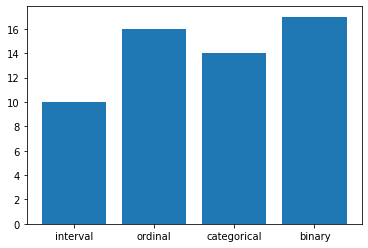

In [ ]:
plt.bar(measurement_scale.keys(),[len(Dtype)for Dtype in measurement_scale.values()])

In [ ]:
print("the binary columns in data is : ",measurement_scale['binary'])

the binary columns in data is :  ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [ ]:
print("the categorical columns in data is : ",measurement_scale['categorical'])

the categorical columns in data is :  ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [ ]:
len(measurement_scale['binary']),len(measurement_scale['ordinal']),len(measurement_scale['interval']),len(measurement_scale['categorical'])

(17, 16, 10, 14)

### Our inferences about interval,ordinal and binary variables

In [ ]:
binary_data=data[measurement_scale['binary']]
ordinal_data=data[measurement_scale['ordinal']]
interval_data=data[measurement_scale['interval']]

In [ ]:
for col in binary_data:
  print(binary_data[col].value_counts())
  print('---')


0    360852
1    234360
Name: ps_ind_06_bin, dtype: int64
---
0    442223
1    152989
Name: ps_ind_07_bin, dtype: int64
---
0    497644
1     97568
Name: ps_ind_08_bin, dtype: int64
---
0    484917
1    110295
Name: ps_ind_09_bin, dtype: int64
---
0    594990
1       222
Name: ps_ind_10_bin, dtype: int64
---
0    594205
1      1007
Name: ps_ind_11_bin, dtype: int64
---
0    589594
1      5618
Name: ps_ind_12_bin, dtype: int64
---
0    594648
1       564
Name: ps_ind_13_bin, dtype: int64
---
1    393330
0    201882
Name: ps_ind_16_bin, dtype: int64
---
0    523143
1     72069
Name: ps_ind_17_bin, dtype: int64
---
0    503879
1     91333
Name: ps_ind_18_bin, dtype: int64
---
0    522342
1     72870
Name: ps_calc_15_bin, dtype: int64
---
1    373698
0    221514
Name: ps_calc_16_bin, dtype: int64
---
1    329856
0    265356
Name: ps_calc_17_bin, dtype: int64
---
0    424278
1    170934
Name: ps_calc_18_bin, dtype: int64
---
0    387469
1    207743
Name: ps_calc_19_bin, dtype: int64
---
0  

In [ ]:
zeroes = []
ones = []
for col in measurement_scale['binary']:
    zeroes.append((data[col] == 0).sum())
    ones.append((data[col] == 1).sum())

trace1 = go.Bar(
    x=measurement_scale['binary'],
    y=zeroes ,
    name='Zero count'
)
trace2 = go.Bar(
    x=measurement_scale['binary'],
    y=ones,
    name='One count'
)

data_ = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data_, layout=layout)
py.iplot(fig, filename='stacked-bar')



in all column count of rows that have 0 value more than 1 

In [ ]:
for col in ordinal_data:
  print(ordinal_data[col].value_counts())
  print('---')

0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: ps_ind_01, dtype: int64
---
2     96110
3     81973
1     67994
4     67213
5     62803
6     60406
7     52364
8     39667
9     25436
0     15514
10    14484
11    11248
Name: ps_ind_03, dtype: int64
---
0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64
---
7     65336
8     59600
6     58408
10    54341
11    53215
9     45497
12    44851
5     42553
4     41770
13    35256
3     32267
0     31826
2     18675
1     11617
Name: ps_ind_15, dtype: int64
---
 3    318919
 2    189353
 1     60952
 0     25983
-1         5
Name: ps_car_11, dtype: int64
---
2    193977
3    175512
1    108012
4     79606
0     23912
5     14193
Name: ps_calc_04, dtype: int64
---
2    195160
1    170860
3    119192
0     61226
4     40682
5      7534
6       558
Name: ps_calc_05, dtype: int64
---
8     175015
7     139771
9     129207
6      73478
10     43085
5     

In [ ]:
zero = []
one = []
two = []
three = []
four = []
for col in measurement_scale['ordinal']:
    zero.append((data[col] == 0).sum())
    one.append((data[col] == 1).sum())
    two.append((data[col] == 2).sum())
    three.append((data[col] == 3).sum())


trace1 = go.Bar(
    x=measurement_scale['ordinal'],
    y=zero ,
    name='Zero count'
)
trace2 = go.Bar(
    x=measurement_scale['ordinal'],
    y=one,
    name='One count'
)
trace3 = go.Bar(
    x=measurement_scale['ordinal'],
    y=two,
    name='two count'
)
trace4 = go.Bar(
    x=measurement_scale['ordinal'],
    y=three,
    name='three count'
)

data_ = [trace1, trace2,trace3,trace4]
layout = go.Layout(
    barmode='stack',
    title='Count for first 4 classes in ordinal varibles'
)

fig = go.Figure(data=data_, layout=layout)
py.iplot(fig, filename='stacked-bar')



4 class at least for each column

In [ ]:
# Look at the values and their number for each column
for col in interval_data:
  print(interval_data[col].value_counts())
  print('---')

0.9    194608
0.7     67897
0.8     60277
0.6     56243
0.4     53569
0.1     43192
0.3     40290
0.5     32341
0.2     25113
0.0     21682
Name: ps_reg_01, dtype: int64
---
0.2    114886
0.3     95033
0.0     89297
0.4     59746
0.5     36528
0.6     33474
0.1     31816
0.7     21210
0.8     19907
0.9     16788
1.2     15843
1.0     12570
1.3     11761
1.1     11321
1.4      6877
1.5      5845
1.6      5095
1.8      4737
1.7      2478
Name: ps_reg_02, dtype: int64
---
-1.000000    107772
 0.633936       664
 0.602599       637
 0.704894       627
 0.587899       616
              ...  
 1.530114         1
 1.518017         1
 2.039301         1
 1.620764         1
 1.578369         1
Name: ps_reg_03, Length: 5013, dtype: int64
---
0.316228    170579
0.400000    111873
0.374166     98598
0.447214     49318
0.424264     49293
             ...  
0.370405         1
0.699428         1
0.479062         1
0.591439         1
0.581206         1
Name: ps_car_12, Length: 184, dtype: int64
---
0.

In [ ]:
# to calculate maximum and minimum value for each column
for col in interval_data: 
  print(col, max(data[col]),min(data[col]))

ps_reg_01 0.9 0.0
ps_reg_02 1.8 0.0
ps_reg_03 4.037945022 -1.0
ps_car_12 1.264911064 -1.0
ps_car_13 3.720626003 0.250619068
ps_car_14 0.6363961029999999 -1.0
ps_car_15 3.741657387 0.0
ps_calc_01 0.9 0.0
ps_calc_02 0.9 0.0
ps_calc_03 0.9 0.0


almost the range in interval columns data is between 0.0 and 4.037945022.<br> we have 4 columns in percent formula [0.0:0.9] .

### is the data balanced or imbalanced?

In [ ]:
target_count=data.target.value_counts()

In [ ]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 573518
Class 1: 21694


In [ ]:
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
(target_count *100)/len(data) # We note that a very small percentage of people clamid insurance

Proportion: 26.44 : 1


0    96.355248
1     3.644752
Name: target, dtype: float64

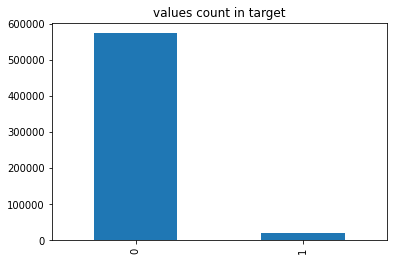

In [ ]:
target_count.plot(kind='bar',title='values count in target')
# sns.countplot(x=target_count)

as we see we have imbalanced data . so we will take some steps to make it balanced.<br>
the famous way is resampling :<br> It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


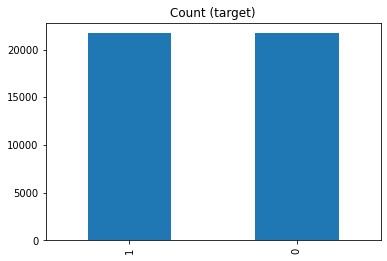

In [ ]:
df_class_0 = data[data['target'] == 0]
df_class_1 = data[data['target'] == 1]

count_class_0=len(df_class_0)
count_class_1=len(df_class_1)

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');


Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


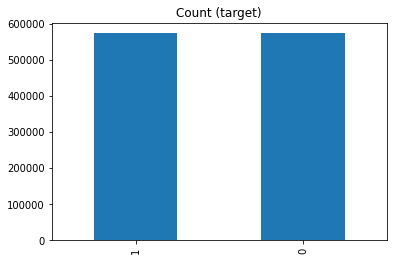

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');


In [ ]:
# for make it 12% blanced 

# way 1 -- unnder sampling
sample_f_class_0=int(np.ceil((count_class_1*88)/12))-1
print(sample_f_class_0)
df_class_0_under = df_class_0.sample(sample_f_class_0)
df_test_under_12 = pd.concat([df_class_0_under, df_class_1], axis=0)

print('12% under-sampling:')
print(df_test_under_12.target.value_counts())
print((df_test_under_12.target.value_counts() *100)/len(df_test_under_12))
print(len(df_test_under_12))

#way 2 -- over sampling 

all_counts=count_class_0+count_class_1
sample_f_class_1=int(( all_counts*12)/100)+6782
df_class_1_over = df_class_1.sample(sample_f_class_1, replace=True)
df_test_over_12 = pd.concat([df_class_0, df_class_1_over], axis=0)

print('12% over-sampling:')
print(df_test_over_12.target.value_counts())
print((df_test_over_12.target.value_counts() *100)/len(df_test_over_12))
print(len(df_test_over_12))


159089
12% under-sampling:
0    159089
1     21694
Name: target, dtype: int64
0    87.999978
1    12.000022
Name: target, dtype: float64
180783
12% over-sampling:
0    573518
1     78207
Name: target, dtype: int64
0    88.0
1    12.0
Name: target, dtype: float64
651725


In [ ]:
new_data=df_test_over_12

In [ ]:
columns_with_null=(new_data[new_data.isin([-1])].sum().sort_values())
columns_with_null

ps_car_03_cat    -446460.0
ps_car_05_cat    -288671.0
ps_reg_03        -115815.0
ps_car_14         -47080.0
ps_car_07_cat     -13789.0
ps_ind_05_cat      -7031.0
ps_car_09_cat       -699.0
ps_ind_02_cat       -305.0
ps_car_01_cat       -180.0
ps_ind_04_cat       -151.0
ps_car_11             -5.0
ps_car_12             -1.0
ps_car_15              0.0
ps_calc_01             0.0
ps_calc_02             0.0
ps_calc_03             0.0
ps_car_13              0.0
ps_calc_04             0.0
ps_calc_06             0.0
ps_calc_07             0.0
ps_calc_08             0.0
ps_calc_09             0.0
ps_calc_10             0.0
ps_calc_11             0.0
ps_calc_12             0.0
ps_calc_13             0.0
ps_calc_14             0.0
ps_calc_15_bin         0.0
ps_calc_16_bin         0.0
ps_calc_17_bin         0.0
ps_calc_18_bin         0.0
ps_calc_05             0.0
ps_car_11_cat          0.0
id                     0.0
ps_car_08_cat          0.0
target                 0.0
ps_ind_01              0.0
p

12 column [ps_car_03_cat,ps_car_05_cat]

### Handaling null values

In [ ]:
columns_with_null=columns_with_null[:12] # to get only columns with null values

In [ ]:
data_len=len(new_data)
for col , val in zip(columns_with_null.index,columns_with_null.values):
  precent_null=(val*-100)/data_len
  print(col,':',precent_null)
  
  if  precent_null>=60.0:
    print('remove column :',col)
    print('---')

ps_car_03_cat : 68.5043538302198
remove column : ps_car_03_cat
---
ps_car_05_cat : 44.29337527331313
ps_reg_03 : 17.77053204956078
ps_car_14 : 7.223905788484407
ps_car_07_cat : 2.115769688135333
ps_ind_05_cat : 1.078829260807856
ps_car_09_cat : 0.10725382638382754
ps_ind_02_cat : 0.04679887989566151
ps_car_01_cat : 0.027619011085964172
ps_ind_04_cat : 0.02316928152211439
ps_car_11 : 0.0007671947523878936
ps_car_12 : 0.00015343895047757874


now we will  delete ps_car_03_cat column  , predict the null values of ps_car_05_cat column, take the mean of [ps_reg_03,ps_car_14] columns and finally delete the rows with null values  for the remaining columns

In [ ]:
new_data.drop('ps_car_03_cat',axis=1,inplace=True) 

new_data.ps_reg_03.replace(-1,np.mean(new_data.ps_reg_03),inplace=True)
new_data.ps_car_14.replace(-1,np.mean(new_data.ps_car_14),inplace=True)

# splitting data to data_to_predict that contains -1 as target and data_to_train that is haven't -1

to_predict=new_data[new_data.ps_car_05_cat.isin([-1])]
to_train=new_data[~new_data.ps_car_05_cat.isin([-1])]
X_train,y_train=to_train.drop(['ps_car_05_cat','id'],axis=1),to_train.ps_car_05_cat
X_test,y_test=to_predict.drop(['ps_car_05_cat','id'],axis=1),to_predict.ps_car_05_cat
model=RandomForestClassifier() # we got the best accuracy with random forest
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
new_data.loc[new_data.ps_car_05_cat.isin([-1]),'ps_car_05_cat']=y_pred
print(new_data.ps_car_05_cat.value_counts())

new_data.replace(-1,np.NaN,inplace=True)

new_data.dropna(inplace=True)

1    333449
0    318276
Name: ps_car_05_cat, dtype: int64


In [ ]:
(new_data[new_data.isin([-1])].sum().sort_values()) #to check from the result 

id                0.0
ps_car_10_cat     0.0
ps_car_11_cat     0.0
ps_car_11         0.0
ps_car_12         0.0
ps_car_13         0.0
ps_car_14         0.0
ps_car_15         0.0
ps_calc_01        0.0
ps_calc_02        0.0
ps_calc_03        0.0
ps_calc_04        0.0
ps_calc_05        0.0
ps_calc_06        0.0
ps_calc_07        0.0
ps_calc_08        0.0
ps_calc_09        0.0
ps_calc_10        0.0
ps_calc_11        0.0
ps_calc_12        0.0
ps_calc_13        0.0
ps_calc_14        0.0
ps_calc_15_bin    0.0
ps_calc_16_bin    0.0
ps_calc_17_bin    0.0
ps_calc_18_bin    0.0
ps_car_09_cat     0.0
ps_car_08_cat     0.0
ps_car_07_cat     0.0
ps_car_06_cat     0.0
target            0.0
ps_ind_01         0.0
ps_ind_02_cat     0.0
ps_ind_03         0.0
ps_ind_04_cat     0.0
ps_ind_05_cat     0.0
ps_ind_06_bin     0.0
ps_ind_07_bin     0.0
ps_ind_08_bin     0.0
ps_ind_09_bin     0.0
ps_ind_10_bin     0.0
ps_ind_11_bin     0.0
ps_calc_19_bin    0.0
ps_ind_12_bin     0.0
ps_ind_14         0.0
ps_ind_15 

In [ ]:
(new_data.isnull().sum().sort_values())

id                0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0
ps_calc_15_bin    0
ps_calc_16_bin    0
ps_calc_17_bin    0
ps_calc_18_bin    0
ps_car_09_cat     0
ps_car_08_cat     0
ps_car_07_cat     0
ps_car_06_cat     0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_calc_19_bin    0
ps_ind_12_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0


### Data correlation

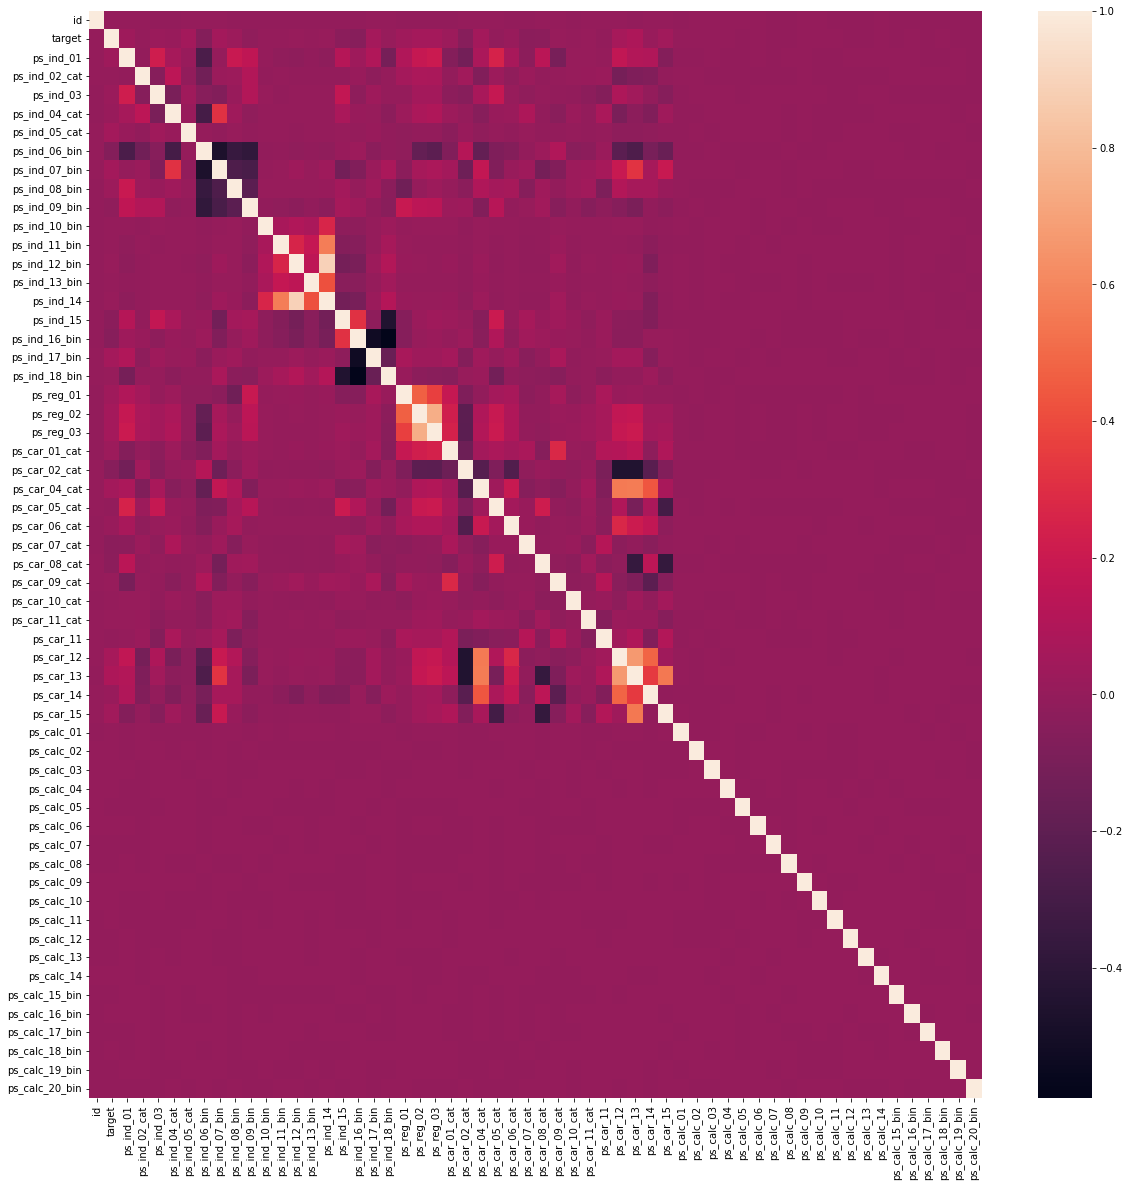

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_data.corr())

In [ ]:
max(new_data.corr()['target'][2:]),min((new_data.corr()['target']))

(0.08771015857576792, -0.05694959153730914)

as we see calc columns don't affect on the target and all  remaing features has small affect that maybe make the prediction hard. 

#### Which interval variables have strong correlation?

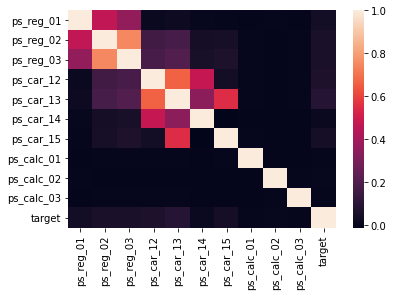

In [ ]:
interval_data_and_target=new_data[measurement_scale['interval']]
interval_data_and_target['target']=new_data.target
# plt.figure(figsize=(10,10))
sns.heatmap(interval_data_and_target.corr())

ps_car_13 has strong relation with target .<br>
And between them  [ps_car_13 ->ps_car_12]

#### What's the level of correlation among ordinal features?

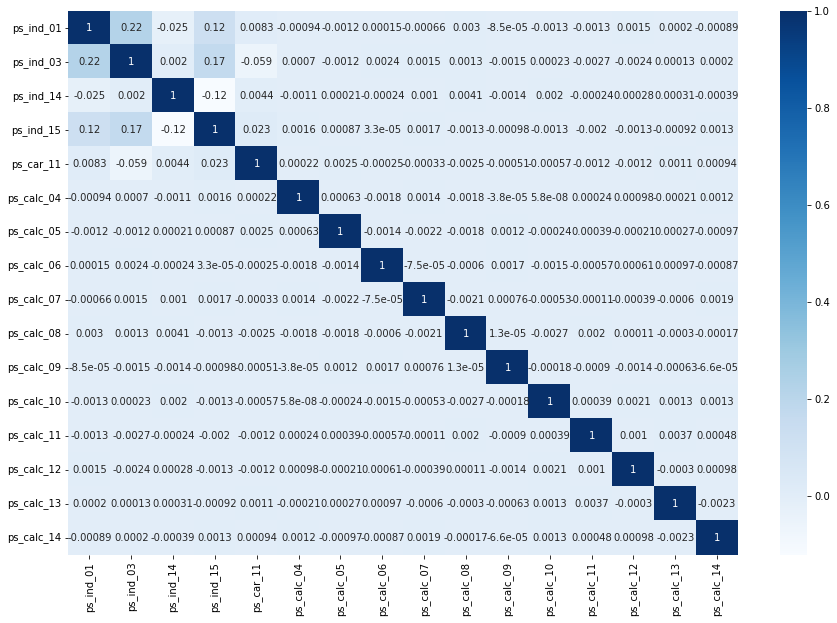

In [ ]:
ordinal_new_data=data[measurement_scale['ordinal']]
plt.figure(figsize=(15,10))
sns.heatmap(ordinal_new_data.corr(),annot=True,cmap='Blues')

Almost all data is between -0.12 to 1 also 5 columns have relation between them

### One Hot Encoding for categorical features

In [ ]:
measurement_scale['categorical'].pop(5) #Because we already deleted it

'ps_car_03_cat'

In [ ]:
measurement_scale['categorical'] 

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [ ]:
categorical_data=new_data[measurement_scale['categorical']]

enc=OneHotEncoder()
Cat_enc=enc.fit_transform(categorical_data)
Cat_dataframe=pd.DataFrame(Cat_enc.toarray())
Cat_dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636910,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636911,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
636912,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636913,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### which features are suitable for StandardScaler in interval& categorical?

In [ ]:
int_a_cat=measurement_scale['interval']+measurement_scale['categorical']
int_a_cat=new_data[int_a_cat]
int_a_cat

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,2.0,1.0,0.0,10.0,1,0,1,4,1.0,0,0.0,1,12
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,1.0,0.0,0.0,11.0,1,0,0,11,1.0,1,2.0,1,19
2,0.0,0.0,0.561905,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,4.0,1.0,0.0,7.0,1,0,1,14,1.0,1,2.0,1,60
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,1.0,0.0,0.0,7.0,1,0,1,11,1.0,1,3.0,1,104
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2.0,1.0,0.0,11.0,1,0,1,14,1.0,1,2.0,1,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259819,0.7,0.3,0.564579,0.400000,0.804999,0.321248,3.316625,0.0,0.4,0.1,1.0,1.0,0.0,7.0,1,0,0,1,1.0,1,0.0,1,74
28030,0.9,0.3,0.718505,0.374166,0.849745,0.321403,3.605551,0.3,0.4,0.0,3.0,0.0,0.0,7.0,1,0,0,11,1.0,1,2.0,1,101
373576,0.4,0.6,0.828779,0.316228,0.790661,0.329242,3.741657,0.6,0.0,0.7,2.0,1.0,0.0,11.0,1,0,0,14,0.0,0,0.0,1,82
39259,0.7,0.6,1.216296,0.565685,1.318339,0.518652,3.000000,0.9,0.3,0.6,1.0,0.0,0.0,4.0,0,8,0,13,1.0,1,0.0,1,4


In [ ]:
for i in int_a_cat: 
  print(int_a_cat[i].value_counts())
  print(min(int_a_cat[i]),max(int_a_cat[i]))
  print(len(int_a_cat[i].value_counts()))
  print('---')


0.9    209146
0.7     73335
0.8     64382
0.6     60465
0.4     57257
0.1     45433
0.3     42717
0.5     34338
0.2     26554
0.0     23288
Name: ps_reg_01, dtype: int64
0.0 0.9
10
---
0.2    122093
0.3    101913
0.0     95114
0.4     64148
0.5     39407
0.6     36224
0.1     33381
0.7     22890
0.8     21589
0.9     18288
1.2     17103
1.0     13549
1.3     12691
1.1     12207
1.4      7328
1.5      6131
1.6      5440
1.8      4862
1.7      2557
Name: ps_reg_02, dtype: int64
0.0 1.8
19
---
0.561905    114136
0.633936       736
0.602599       688
0.587899       666
0.596343       657
             ...  
1.260952         1
2.144178         1
1.611676         1
1.397990         1
1.578369         1
Name: ps_reg_03, Length: 5005, dtype: int64
0.061237244 4.037945022
5005
---
0.316228    180877
0.400000    121348
0.374166    106583
0.424264     54082
0.447214     52419
             ...  
0.704699         1
0.496387         1
0.818535         1
0.479062         1
0.581206         1
Name: ps_

(array([2.90080e+04, 3.63851e+05, 1.90479e+05, 4.26980e+04, 9.23400e+03,
        1.33000e+03, 2.50000e+02, 5.90000e+01, 4.00000e+00, 2.00000e+00]),
 array([0.25061907, 0.53797938, 0.8253397 , 1.11270001, 1.40006033,
        1.68742064, 1.97478096, 2.26214127, 2.54950159, 2.8368619 ,
        3.12422222]),
 <a list of 10 Patch objects>)

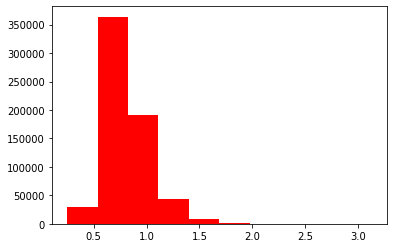

In [ ]:
plt.hist(new_data.ps_car_13,color='red')

ps_car_13 the most column that is suitable for StandardScaler

### Summary


We have 57 features, all of them are integer  except 10 of them are float . the target  considered as binary classification meaning that it has two values, either 0 or 1 . The features are classified into four main classes {ind, reg, car, calc} . The Bin class has the most features with 20 features  and the least of them is the reg with 3 features. In addition, the features of the Binary type have a value of zero more than one, while the features of the Ordinal type have at least 4 classes.
The dataset is unbalanced in target and in order to make it balanced by 12%, we need to make 0 = 573518 while 1 = 78207. the (ps_car_13) feature being the most closely related to target column.


## Modeling 

### Features enginering 

now let's train data with Machine learning algorthms .
but before do that We will reduce the number of features 

In [ ]:
clean_data=new_data.drop(['id','target'],axis=1)
target=new_data.target

In [ ]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(clean_data) 

f = np.vectorize(lambda x : not x) # Function to toggle boolean_array elements
v = clean_data.columns[f(selector.get_support())]
print(f'{len(v)} variables have too low variance.')
print(f'These variables are {list(v)}')


7 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_10_cat', 'ps_car_12', 'ps_car_14']


In [ ]:
clean_data.drop(list(v),axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(clean_data,target,test_size=.2)

In [ ]:
StandardSC=StandardScaler()
StandardSC.fit(X_train)
X_train=StandardSC.transform(X_train)
X_test=StandardSC.transform(X_test)

### Logistic Regression model

In [ ]:
model=LogisticRegressionCV()
model.fit(X_train,y_train)
pred=model.predict(X_test)

print(classification_report(y_test,pred))
print('accuracy score : ',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    112327
           1       0.00      0.00      0.00     15056

    accuracy                           0.88    127383
   macro avg       0.44      0.50      0.47    127383
weighted avg       0.78      0.88      0.83    127383

accuracy score :  0.8817974140976426
[[112326      1]
 [ 15056      0]]


we got a good value in accurace but what is the problem here ? the problem in f1-score for 1 we got 0 and that because our data is imbleanced and recall with precision is 0 .<br>
so let's add some modification for the model

In [ ]:
# make data is blanced with 50% for each class 
df_class_0 = data[data['target'] == 0]
df_class_1 = data[data['target'] == 1]

count_class_0=len(df_class_0)
count_class_1=len(df_class_1)


df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

data_f_blanced_data = df_test_over.drop(list(v),axis=1)
target_f_blanced_data = data_f_blanced_data.target
data_f_blanced_data =data_f_blanced_data.drop(['id','target'],axis=1)

X_train_b,X_test_b,y_train_b,y_test_b=train_test_split(data_f_blanced_data, target_f_blanced_data,test_size=.2)

model=LogisticRegressionCV()

model.fit(X_train_b,y_train_b)
y_pred_b=model.predict(X_test_b)

print(classification_report(y_test_b,y_pred_b))
print('accuracy score : ',accuracy_score(y_test_b,y_pred_b))
print(confusion_matrix(y_test_b,y_pred_b))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60    114729
           1       0.59      0.55      0.57    114679

    accuracy                           0.59    229408
   macro avg       0.59      0.59      0.59    229408
weighted avg       0.59      0.59      0.59    229408

accuracy score :  0.5876168224299065
[[71745 42984]
 [51620 63059]]


now f1-score is more better after data become balanced but the accuracy decreased a lot

### LinearSVC model

In [ ]:
LSVC=LinearSVC(max_iter=1200,dual=True)
LSVC.fit(X_train,y_train)
y_pred_lsvc=LSVC.predict(X_test)

print(classification_report(y_test,y_pred_lsvc))
print('accuracy score : ',accuracy_score(y_test,y_pred_lsvc))
print(confusion_matrix(y_test,y_pred_lsvc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    112327
           1       0.00      0.00      0.00     15056

    accuracy                           0.88    127383
   macro avg       0.44      0.50      0.47    127383
weighted avg       0.78      0.88      0.83    127383

accuracy score :  0.8818052644387399
[[112327      0]
 [ 15056      0]]


There are no improvements

### SVC model

In [ ]:
x_tr=X_train_b[:70000]
y_tr=y_train_b[:70000]

clf = SVC(kernel='linear')
clf.fit(x_tr, y_tr)

y_pred_svc = clf.predict(X_test_b)
print(classification_report(y_test_b,y_pred_svc))
print('accuracy score : ',accuracy_score(y_test_b,y_pred_svc))
print(confusion_matrix(y_test_b,y_pred_svc))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62    114729
           1       0.60      0.47      0.53    114679

    accuracy                           0.58    229408
   macro avg       0.59      0.58      0.58    229408
weighted avg       0.59      0.58      0.58    229408

accuracy score :  0.5811174850048821
[[79550 35179]
 [60916 53763]]


### XGBoost model

In [ ]:
xg_cls = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 50, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train, y_train)
y_pred_xgb = xg_cls.predict(X_test)

print(classification_report(y_test,y_pred_xgb))
print('accuracy score : ',accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    112327
           1       1.00      0.94      0.97     15056

    accuracy                           0.99    127383
   macro avg       1.00      0.97      0.98    127383
weighted avg       0.99      0.99      0.99    127383

accuracy score :  0.9930681488110659
[[112327      0]
 [   883  14173]]


in this case this is the best value for accuracy & f1-score

In [ ]:
# enc=OneHotEncoder()
# data_enc=enc.fit_transform(clean_data)
# data_enc.shape[0]*.80,data_enc.shape[0]

X_train_enc,X_test_enc=data_enc[:509532],data_enc[509532:]

xg_cls.fit(X_train_enc, y_train)
y_pred_xgb_enc = xg_cls.predict(X_test_enc)

print(classification_report(y_test,y_pred_xgb_enc))
print('accuracy score : ',accuracy_score(y_test,y_pred_xgb_enc))
print(confusion_matrix(y_test,y_pred_xgb_enc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    112327
           1       0.00      0.00      0.00     15056

    accuracy                           0.88    127383
   macro avg       0.44      0.50      0.47    127383
weighted avg       0.78      0.88      0.83    127383

accuracy score :  0.8817974140976426
[[112326      1]
 [ 15056      0]]


we didn't need using one hot encoder because already data is encoded but still using this technique make it prediction worse

Q. If not missing a positive sample is the priority which model is best so far?
 - LinearSVC & xgboost -> Count of missing positive sample is nothing [0].<br>

Q. If not marking negative sample as positive is top priority, which model is best so far?

- xgboost -> Count of misclassification for negative sample as positive is 883 . 


### AdaBoost Model

In [ ]:
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada = adaBoost.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print(classification_report(y_test,y_pred_ada))
print('accuracy score : ',accuracy_score(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    112327
           1       0.00      0.00      0.00     15056

    accuracy                           0.88    127383
   macro avg       0.44      0.50      0.47    127383
weighted avg       0.78      0.88      0.83    127383

accuracy score :  0.8817738630743506
[[112323      4]
 [ 15056      0]]


No improvement in AdaBoost model.

### MLP model

MLP classifier is neural network model and to choose the right no. of layers
and size there is some of methods help us to choose the correct number : 
- The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
- The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The no. of hidden neurons should be less than twice the size of the input layer.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_train, y_train.values.ravel())
y_pred_mlp = mlp.predict(X_test)

print(classification_report(y_test,y_pred_mlp))
print('accuracy score : ',accuracy_score(y_test,y_pred_mlp))
print(confusion_matrix(y_test,y_pred_mlp))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    112327
           1       0.00      0.00      0.00     15056

    accuracy                           0.88    127383
   macro avg       0.44      0.50      0.47    127383
weighted avg       0.78      0.88      0.83    127383

accuracy score :  0.8818052644387399
[[112327      0]
 [ 15056      0]]


finally, the model that more appropriate for our data is: **Xgboost Classifier** .